# Alumno: Gerardo de Miguel González

## Predicción Keras 

**Practica 2** - predecir la precipitación en Madrid. Hay que entregar tanto el archivo con la prediccion (.rda) como el codigo que lo genera (.html a ser posible, si lo haceis en jupyter notebooks lo podeis guardar como .html).

 1) Si habéis predicho la ocurrencia de precipitacion y la cantidad de precipitacion por separado entonces enviadme ambas predicciones tal que:

```r
save(yTest_ocu,yTest_reg,file="yTest.rda")
```

 2) Si habeis predicho la ocurrencia y la cantidad de precipitation con el mismo modelo entonces enviadmelo asi:

```r
save(yTest,file="yTest.rda")
```

## Descripción detallada

El objetivo es diseñar una red neuronal que sea capaz de predecir el valor de la precipitación mediante la información de variables de larga escala. El dataset consiste en 450 predictores y un predictando, la precipitación en Madrid.

Hay que tener en cuenta que la precipitación es una variable mixta, ya que habrá días con un valor exacto de 0 y otros que se encuentren en el intervalo (0,inf).

Así pues, diseñar una/s red neuronal/es con KERAS, que sea capaz de predecir la precipitación de acuerdo con los siguientes índices:

  - La ocurrencia de precipitación se evalúa con el AUC.
  - La cantidad de precipitación se evalúa con el MSE.

Podréis valeros de todas las técnicas aprendidas hasta ahora: early stopping, regularización, backpropagation + momento, ajustar el learning rate, poner varias capas y demás. Esto no quiere decir que la red que contenga toda esta variedad de técnicas será la que obtenga un menor error. Tenéis que jugar y probar distintos diseños de redes con el fin de encontrar la que consideréis que obtendría un menor error en un dataset distinto (es decir, que tenga buena
capacidad de generalización).

Construiréis vuestro modelo usando xTrain e yTrain, y después evaluaréis el modelo en xTest. La predicción que resulte al evaluar el modelo en xTest es lo que tenéis que guardar en un fichero y lo que se envía para corrección:

```r
save(yTest, file = “yTest.rda”)
```

**NOTA**: se considera día de lluvia si el valor de precipitación es mayor que 1, sino convertir a 0.

## Dataset Meteo Madrid

Se proporciona el dataset `Madrid_Alumno.rda` junto con el enunciado de la práctica

In [1]:
file.info('data/Madrid_Alumno.rda')

,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
data/Madrid_Alumno.rda,20099579,FALSE,644,2019-03-22 11:31:26,2019-03-22 11:31:26,2019-03-22 11:35:08,1000,100,jovyan,users


In [2]:
#::GMG::Cargo en memoria el rda
# https://stat.ethz.ch/R-manual/R-devel/library/base/html/load.html
load('data/Madrid_Alumno.rda')

In [3]:
#::GMG::Tengo los tres "objetos" que se mencionan en el enunciado
ls()

[1] "xTest"  "xTrain" "yTrain"

In [4]:
str(xTest)

 num [1:2192, 1:450] 57168 56932 56256 55960 55665 ...


In [5]:
class(xTest)

[1] "matrix"

In [6]:
dim(xTest)

[1] 2192  450

In [7]:
str(xTrain)

 num [1:8766, 1:450] 57043 56963 56523 54628 53584 ...


In [8]:
class(xTrain)

[1] "matrix"

In [9]:
dim(xTrain)

[1] 8766  450

In [10]:
str(yTrain)

 num [1:8766(1d)] 0.2 0 7.4 0 0 1.6 7.8 0 0 0 ...
 - attr(*, "dimensions")= chr "time"


In [11]:
class(yTrain)

[1] "array"

In [12]:
dim(yTrain)

[1] 8766

In [13]:
dim(as.matrix(yTrain))

[1] 8766    1

## Bibliotecas

In [21]:
library(keras)


Attaching package: ‘keras’

The following object is masked _by_ ‘.GlobalEnv’:

    normalize



In [22]:
library('verification')

Loading required package: fields
Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.2-1 (2018-12-20) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps
See www.image.ucar.edu/~nychka/Fields for
 a vignette and other supplements. 
Loading required package: boot
Loading required package: CircStats
Loading required package: MASS
Loading required package: dtw
Loading required package: proxy

Attaching package: ‘proxy’

The following object is masked from ‘package:spam’:

    as.matrix

The following objects are masked from ‘package:stats’:

    as.dist, dist

The following object is masked from ‘package:base’:

    a

In [23]:
library('MLmetrics')


Attaching package: ‘MLmetrics’

The following object is masked from ‘package:base’:

    Recall



## Preparación de los datos

In [14]:
# normalizado de features xTrain, xTest
normalize <- function(x) {
    return ((x - min(x)) / (max(x) - min(x)))
}

In [15]:
xTrain_n <- normalize(xTrain)

In [16]:
xTest_n <- normalize(xTest)

In [17]:
# Discretizado wet/dry para clasisifcación yTrain
occurrence <- ifelse(yTrain >= 1, 1, 0)

In [18]:
str(occurrence)

 num [1:8766(1d)] 0 0 1 0 0 1 1 0 0 0 ...


In [31]:
paste(head(yTrain), '-->', head(occurrence))

[1] "0.2 --> 0" "0 --> 0"   "7.4 --> 1" "0 --> 0"   "0 --> 0"   "1.6 --> 1"

In [26]:
# imbalanced dataset
# tenerlo en cuenta en train/test para evaluación (?)
table(occurrence)
#barplot(height = table(occurrence),
#        col = c('brown','darkblue'),
#        names.arg = c('dry','wet'))

occurrence
   0    1 
7430 1336 

In [43]:
prop.table(table(occurrence))

occurrence
       0        1 
0.847593 0.152407 

In [24]:
# para la regresión yTrain es precip
precip <- yTrain

In [25]:
ls()

[1] "normalize"  "occurrence" "precip"     "xTest"      "xTest_n"   
[6] "xTrain"     "xTrain_n"   "yTrain"

## Modelo de Clasificación

### Construcción del modelo red inicial

In [32]:
#::GMG::Sigo el guión que hemos trabajado en clase
# Paso 1. Defino mi modelo como una estructura secuencial.
modelo_class_1 <- keras_model_sequential()

In [35]:
#::GMG::Comienzo con una red "simple" con una capa oculta de 10 neuronas
# Paso 2. Defino la topología de la red neuronal
# 450 -- 5 -- 1
modelo_class_1 %>% 
  layer_dense(units = 10, input_shape = c(450), activation = 'sigmoid') %>% 
  layer_dense(units = 1 , activation = 'sigmoid') 

In [36]:
#::GMG::Visualizo mi modelo
str(modelo_class_1)

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_1 (Dense)                     (None, 10)                      4510        
________________________________________________________________________________
dense_2 (Dense)                     (None, 1)                       11          
Total params: 4,521
Trainable params: 4,521
Non-trainable params: 0
________________________________________________________________________________




In [39]:
# ::GMG:: Me mantengo en lo clásico: backprop con SGD, de momento sin optimizaciones
# Paso 3. Defino cómo va a aprender la red: algoritmo de aprendizaje y función a minimizar
modelo_class_1 %>% compile(
  optimizer = optimizer_sgd(lr = 0.1),
  # https://keras.io/losses/
  loss='binary_crossentropy',
  # https://keras.rstudio.com/reference/metric_binary_accuracy.html
  metrics='binary_accuracy'
)

In [ ]:
# una medida mejor que accuracy cuando hay desequlibrio entre clases
# Fmeasure <- 2 * precision * recall / (precision + recall)

In [ ]:
#::GMG::Comienzo con una red "simple" con una capa oculta de 10 neuronas
# Paso 2. Defino la topología de la red neuronal# 450 (entradas) -> 16 (hidden layer 1) -> 1 (output layer)
# hiperparámetros: activation (sigmoid), units (20)
# ::duda:: ¿layer_input?
# https://keras.rstudio.com/reference/layer_input.html
#model_1 %>% 
#  layer_dense(units = 5, input_shape = c(450), activation = "sigmoid") %>% 
#  layer_dense(units = 5, activation = "sigmoid") %>% 
#  layer_dense(units = 1, activation = "sigmoid")

### Entrenamiento

In [41]:
# Paso 4. Entreno el modelo y lo valido
# ::GMG:: Voy a controlar un sobreajuste separando un validation set
#         en el entrenamiento (tal y como nos han indicado en las sesiones prácticas)
#::nota:: además voy a monitorizar el tiempo de entrenamiento
# https://www.r-bloggers.com/5-ways-to-measure-running-time-of-r-code/
timeKERAS_begin <- Sys.time()
# https://keras.io/models/sequential/#fit
history_1 <- modelo_class_1 %>% fit(xTrain_n, occurrence, 
                                epochs = 30, 
                                batch_size = 100,
                                validation_split = 0.2)
timeKERAS_end <- Sys.time()
timeKERAS <- timeKERAS_end - timeKERAS_begin
timeKERAS

Time difference of 16.66818 secs

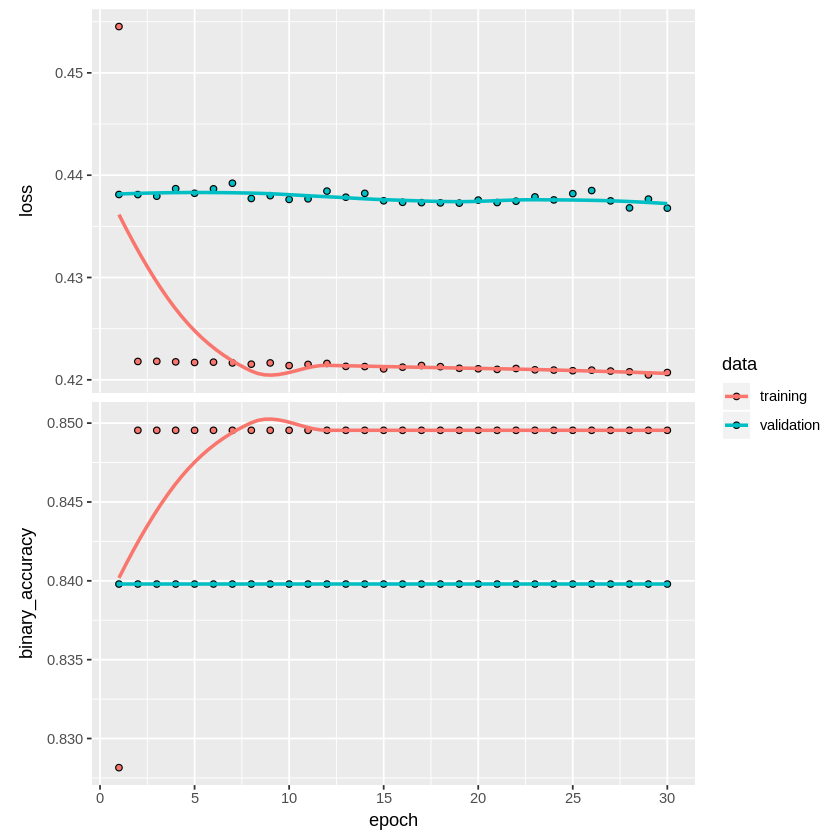

In [42]:
#::GMG::Veo el resultado
plot(history_1)

In [ ]:
# Paso 5. (opcional) regularización L1, L2, ElasticNet(L1/L2)


In [ ]:
# Paso X: evaluación final el modelo
# ::GMG::El problema que tenemos aquí es que no tenemos el yTest
#        por lo tanto este sería el paso previo a la grabación del
#        resultado que nos piden
#pred <- predict(modelo_class,x_test)

### Tuning de hiperparametros

## Modelo de Regresión

### Construcción de la red inicial

### Entrenamiento

### Tuning de hiperparametros

## Grabación de modelos